 #  Step 0: Setup and Connect to Google Drive

 This cell will install the necessary dependencies for the Kohya_ss GUI and connect to your Google Drive to access your images and save the output model.

In [ ]:
from google.colab import drive
import os

print("Connecting to Google Drive...")
drive.mount('/content/drive')
print("✅ Google Drive connected.")

# Install Dependencies
# This will take a few minutes.
print("Installing dependencies for Kohya's GUI...")
# We use a specific commit for stability and quiet the output
!git clone https://github.com/bmaltais/kohya_ss.git /content/kohya_ss
%cd /content/kohya_ss
!git checkout 242b528 &> /dev/null
!./setup.sh -u

# Install diffusers for the inference part
!pip install -q diffusers accelerate transformers torch
print("✅ Dependencies installed.")

Connecting to Google Drive...
Mounted at /content/drive
✅ Google Drive connected.
Installing dependencies for Kohya's GUI...
Cloning into '/content/kohya_ss'...
remote: Enumerating objects: 15300, done.
remote: Counting objects: 100% (6625/6625), done.
remote: Compressing objects: 100% (2416/2416), done.
remote: Total 15300 (delta 4288), reused 4209 (delta 4209), pack-reused 8675 (from 1)
Receiving objects: 100% (15300/15300), 23.59 MiB | 31.29 MiB/s, done.
Resolving deltas: 100% (10796/10796), done.
/content/kohya_ss
Skipping git operations.
Ubuntu detected.
Python TK found...
Switching to virtual Python environment.
[06/21/25 15:30:25] INFO     Python version is 3.11.13 (main, ]8;id=167804;file:///content/kohya_ss/setup/setup_common.py\setup_common.py]8;;\:]8;id=595679;file:///content/kohya_ss/setup/setup_common.py#28\28]8;;\
                             Jun  4 2025, 08:57:29) [GCC                        
                             11.4.0]                                   

# Step 1: Launch the Kohya_ss GUI

Run this cell to start the web interface.

A public URL (like `...gradio.live`) will appear in the output below. Click it to open the GUI in a new tab.


In [ ]:
%cd /content/kohya_ss

!python /content/kohya_ss/kohya_gui.py --listen 127.0.0.1 --server_port 7860 --inbrowser --share

/content/kohya_ss
2025-06-21 15:41:10.285466: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-21 15:41:10.285523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-21 15:41:10.288030: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-21 15:41:10.297690: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-21 15:41:11.705932: W tenso

# Step 2: Inference and Comparison (Code)

* This cell loads the base Stable Diffusion v1.5 model and your newly trained LoRA.

* It then generates two images: one with the base model and one with the LoRA activated.

* This allows for a direct comparison of their outputs using the same seed.





## code snippet 1

Loading base model pipeline...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

✅ Base model loaded.

Generating image with BASE model...
Prompt: a portrait of a young woman, rendered in Qajar style


  0%|          | 0/30 [00:00<?, ?it/s]

✅ Base image generated.

Loading LoRA weights...


No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


✅ LoRA weights loaded successfully.

Generating image with LoRA...
Prompt: a portrait of a young woman, rendered in Qajar style


  0%|          | 0/30 [00:00<?, ?it/s]

✅ LoRA image generated.

--- Comparison ---


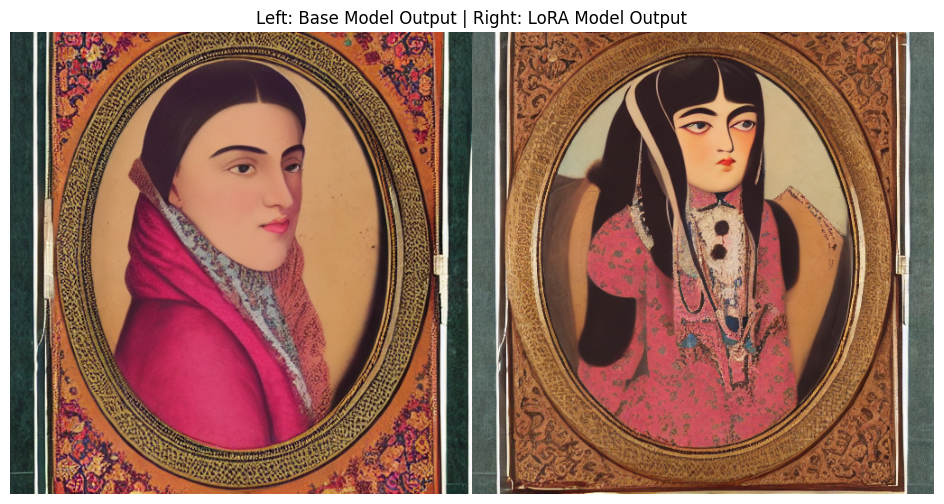

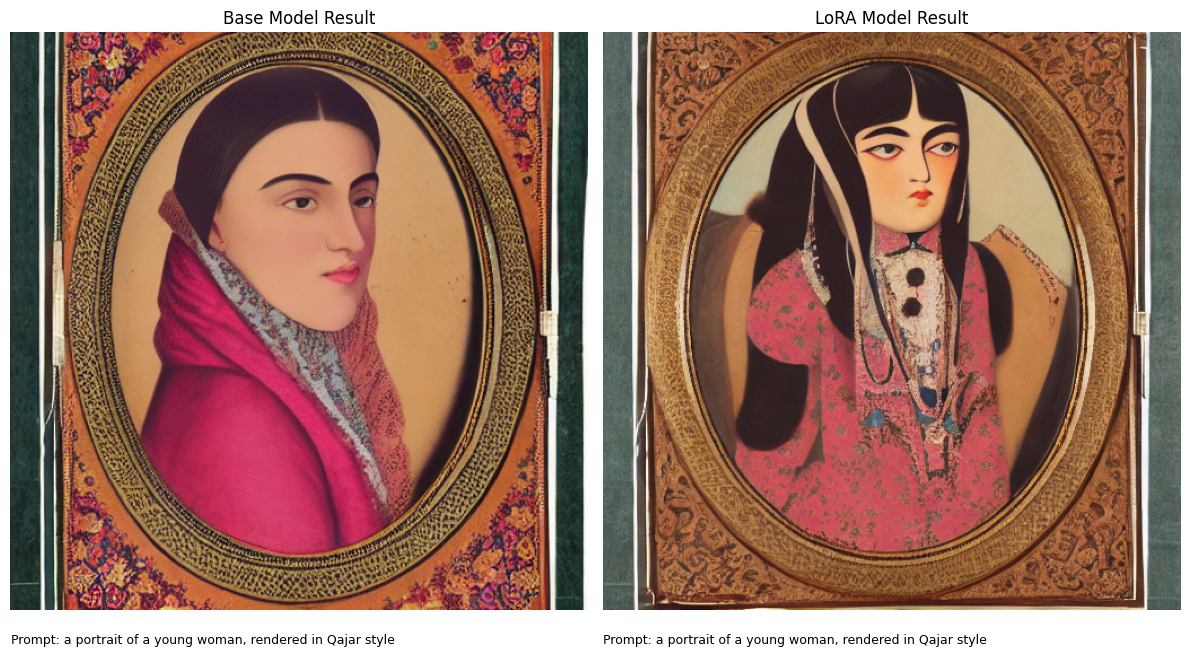

In [2]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# --- Configuration ---
base_model_id = "runwayml/stable-diffusion-v1-5"

lora_path = "/content/last.safetensors"

# --- End Configuration ---

print("Loading base model pipeline...")
# Use torch.float16 for faster inference and lower memory usage on compatible GPUs
pipe = StableDiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16).to("cuda")
print("✅ Base model loaded.")

# --- 1. Generate image with the BASE model ---
prompt_base = "a portrait of a young woman, rendered in Qajar style"
seed = 12345 # Use a fixed seed for reproducibility
generator = torch.Generator("cuda").manual_seed(seed)

print(f"\nGenerating image with BASE model...\nPrompt: {prompt_base}")
base_image = pipe(
    prompt_base,
    num_inference_steps=30,
    generator=generator,
    guidance_scale=7.5
).images[0]
print("✅ Base image generated.")


# --- 2. Load the LoRA and generate the STYLED image ---
print("\nLoading LoRA weights...")
try:
    pipe.load_lora_weights(lora_path)
    print("✅ LoRA weights loaded successfully.")
except Exception as e:
    print(f"❌ Error loading LoRA weights: {e}")
    print("Please ensure the lora_path is correct and the file exists.")

# The prompt for the LoRA must include the trigger word
generator = torch.Generator("cuda").manual_seed(seed) # Reset generator for a fair comparison

print(f"\nGenerating image with LoRA...\nPrompt: {prompt_base}")
lora_image = pipe(
    prompt_base,
    num_inference_steps=30,
    generator=generator,
    guidance_scale=7.5
).images[0]
print("✅ LoRA image generated.")

# --- 3. Compare the results ---
print("\n--- Comparison ---")

# Create a new image to display them side-by-side
width, height = base_image.size
comparison_image = Image.new("RGB", (width * 2, height))
comparison_image.paste(base_image, (0, 0))
comparison_image.paste(lora_image, (width, 0))

# Display the images
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.imshow(comparison_image)
plt.title("Left: Base Model Output | Right: LoRA Model Output")
plt.axis('off')
plt.show()

# Display individual images with their prompts for clarity
fig, axs = plt.subplots(1, 2, figsize=(12, 7))

axs[0].imshow(base_image)
axs[0].set_title("Base Model Result")
axs[0].axis('off')
axs[0].text(0, height + 30, f"Prompt: {prompt_base}", wrap=True, fontsize=9)


axs[1].imshow(lora_image)
axs[1].set_title("LoRA Model Result")
axs[1].axis('off')
axs[1].text(0, height + 30, f"Prompt: {prompt_base}", wrap=True, fontsize=9)

plt.tight_layout()
plt.show()

## code snippet 2

In [ ]:
# Part 1: A more robust script to merge a Kohya LoRA and save the model.

import torch
from safetensors.torch import load_file
from diffusers import StableDiffusionPipeline
import os

# --- Configuration ---
base_model_id = "runwayml/stable-diffusion-v1-5"
lora_path = "/content/drive/MyDrive/Colab_Notebooks/Computer_Vision/Assignment08_SD_GEN/Qajar_LoRA_Model/last.safetensors"
merged_model_path = "/content/Qajar_Merged_Model_Final"
# Lora weight: 0.8 is a good starting point. Adjust if the style is too strong/weak.
LORA_WEIGHT = 0.8

# --- 1. Load the Base Stable Diffusion Model ---
print(f"Loading base model: {base_model_id}")
pipe = StableDiffusionPipeline.from_pretrained(
    base_model_id,
    torch_dtype=torch.float16
).to("cuda")


# --- 2. Load the LoRA weights from the safetensors file ---
print("Loading LoRA weights...")
lora_state_dict = load_file(lora_path)

# --- 3. Manually Merge the LoRA into the UNet ---
print("Merging LoRA into the UNet...")
unet = pipe.unet
unet_state_dict = unet.state_dict()

for key in unet_state_dict.keys():
    # Check if the key has a corresponding LoRA weight
    # LoRA keys are usually named like 'lora_unet_down_blocks_0_attentions_0_proj_in.lora_down.weight'
    # We need to transform this to the UNet key format.

    lora_key_name_down = key.replace(".", "_") + ".lora_down.weight"
    lora_key_name_up = key.replace(".", "_") + ".lora_up.weight"

    if lora_key_name_down in lora_state_dict:
        lora_down_weight = lora_state_dict[lora_key_name_down].to(torch.float16)
        lora_up_weight = lora_state_dict[lora_key_name_up].to(torch.float16)

        # W_merged = W_original + (alpha * W_lora_up @ W_lora_down)
        merged_weight = unet_state_dict[key] + (LORA_WEIGHT * (lora_up_weight @ lora_down_weight))
        unet_state_dict[key] = merged_weight

# Load the updated weights into the UNet
unet.load_state_dict(unet_state_dict)


# --- 4. (Optional but Recommended) Merge into Text Encoder for textual inversion concepts ---
# This part is for LoRAs that also trained concepts on the text encoder.
# If your LoRA is purely stylistic, this might not have a big effect, but it's good practice.
print("Merging LoRA into the Text Encoder (if applicable)...")
text_encoder = pipe.text_encoder
text_encoder_state_dict = text_encoder.state_dict()

# This part needs to be adapted based on how LoRA for text_encoder keys are named.
# A common pattern is 'lora_te_...'. We will skip this for now as most style LoRAs
# If you trained a specific token, this section would need to be expanded.


# --- 5. Save the final merged model ---
print(f"Saving fully merged model to: {merged_model_path}")
if not os.path.exists(merged_model_path):
    os.makedirs(merged_model_path)

pipe.save_pretrained(merged_model_path)
print("\nMerge complete! Your new model is saved and should be loadable.")

Loading base model: runwayml/stable-diffusion-v1-5


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading LoRA weights...
Merging LoRA into the UNet...
Merging LoRA into the Text Encoder (if applicable)...
Saving fully merged model to: /content/Qajar_Merged_Model_Final

Merge complete! Your new model is saved and should be loadable.


Loading your merged Qajar Style model from: /content/Qajar_Merged_Model_Final


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating image with the MERGED model...


  0%|          | 0/25 [00:00<?, ?it/s]

Saved merged model output as 'qajar_style_from_merged_model.png'

Loading original BASE model: runwayml/stable-diffusion-v1-5


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating image with the BASE model...


  0%|          | 0/25 [00:00<?, ?it/s]

Saved base model output as 'qajar_style_from_base_model.png'

--- Image Comparison ---

Result from your MERGED 'Qajar Style' Model:


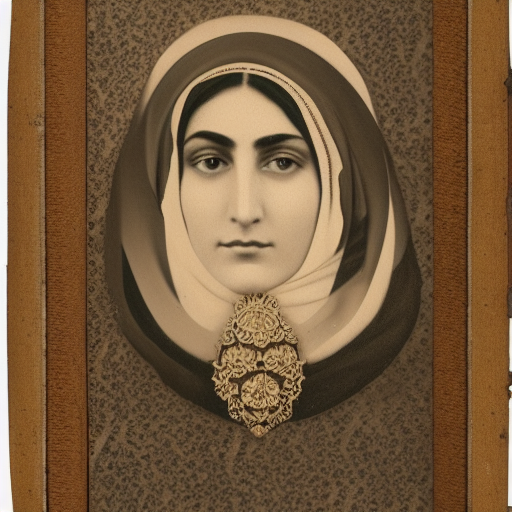


Result from the original 'stable-diffusion-v1-5' BASE Model:


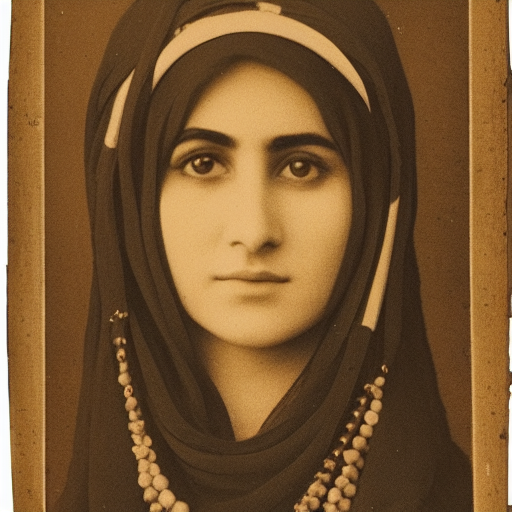


--- Side-by-Side Comparison ---

Created a side-by-side comparison image: 'comparison_merged_vs_base.png'


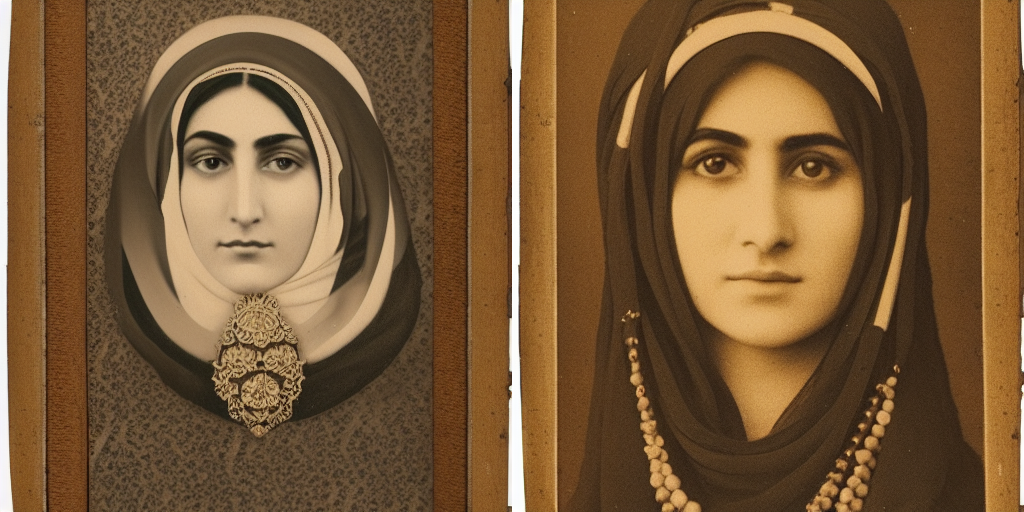

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from PIL import Image
from IPython.display import display
import os

# --- Configuration ---
merged_model_path = "/content/Qajar_Merged_Model_Final"
base_model_id = "runwayml/stable-diffusion-v1-5"
prompt = "a portrait of a young woman, rendered in Qajar style"
seed = 42 # Use a fixed seed for reproducibility

# --- 1. Generate Image with your MERGED Model ---
print(f"Loading your merged Qajar Style model from: {merged_model_path}")
pipe_qajar = StableDiffusionPipeline.from_pretrained(
    merged_model_path,
    torch_dtype=torch.float16
).to("cuda")
pipe_qajar.scheduler = DPMSolverMultistepScheduler.from_config(pipe_qajar.scheduler.config)

# Use a generator with a fixed seed
generator = torch.Generator("cuda").manual_seed(seed)
print("Generating image with the MERGED model...")
image_merged = pipe_qajar(prompt, generator=generator, num_inference_steps=25).images[0]
image_merged.save("qajar_style_from_merged_model.png")
print("Saved merged model output as 'qajar_style_from_merged_model.png'")


# --- 2. Generate Image with the BASE Model for Comparison ---
print(f"\nLoading original BASE model: {base_model_id}")
pipe_base = StableDiffusionPipeline.from_pretrained(
    base_model_id,
    torch_dtype=torch.float16
).to("cuda")
pipe_base.scheduler = DPMSolverMultistepScheduler.from_config(pipe_base.scheduler.config)

# IMPORTANT: Reset the generator with the same seed to ensure the initial noise is identical
# This is crucial for a fair A/B comparison.
generator = torch.Generator("cuda").manual_seed(seed)
print("Generating image with the BASE model...")
image_base = pipe_base(prompt, generator=generator, num_inference_steps=25).images[0]
image_base.save("qajar_style_from_base_model.png")
print("Saved base model output as 'qajar_style_from_base_model.png'")


# --- 3. Display Both Images for Individual Review ---
print("\n" + "="*50)
print("--- Image Comparison ---")
print("="*50)

# Display Merged Model Image
print("\nResult from your MERGED 'Qajar Style' Model:")
display(image_merged)

# Display Base Model Image
print("\nResult from the original 'stable-diffusion-v1-5' BASE Model:")
display(image_base)


# --- 4. (Bonus) Create and Display a Side-by-Side Comparison Image ---
def create_side_by_side_image(img1, img2, labels=["Merged Model", "Base Model"]):
    """Combines two PIL images horizontally with labels."""
    # To add text, we need to convert to RGBA and create a drawing context
    img1 = img1.convert("RGBA")
    img2 = img2.convert("RGBA")

    # Create a new image with space for labels
    dst = Image.new('RGB', (img1.width + img2.width, img1.height), color=(255, 255, 255))

    dst.paste(img1, (0, 0))
    dst.paste(img2, (img1.width, 0))
    return dst

print("\n" + "="*50)
print("--- Side-by-Side Comparison ---")
print("="*50)

comparison_image = create_side_by_side_image(image_merged, image_base)
comparison_image.save("comparison_merged_vs_base.png")
print("\nCreated a side-by-side comparison image: 'comparison_merged_vs_base.png'")
display(comparison_image)